In [ ]:
!pip install transformers
!pip install torchtext

  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.5.0
    Uninstalling torch-2.5.0:
      Successfully uninstalled torch-2.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.0+cu121 requires torch==2.5.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.9.0 requires torch>=2, but you have torch 1.13.1 which is incompatible.
torchvision 0.20.0+cu121 requires torch==2.5.0, but you have torch 1.13.1 which is incompatible.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/drive/My Drive/BTL NLP/train.csv')
dev = pd.read_csv('/content/drive/My Drive/BTL NLP/val.csv')
test = pd.read_csv('/content/drive/My Drive/BTL NLP/test.csv')


train['text'] = train['text'].astype(str)
X_train = train['text']
y_train = train["label"]

dev['text'] = dev['text'].astype(str)
X_valid = dev['text']
y_valid = dev['label']

test['text'] = test['text'].astype(str)
X_test = test['text']
y_test = test['label']

In [8]:
train

,text,label
0,có_lẽ,0.0
1,công_an bắt? t.ử hì.nh!,1.0
2,hi_vọng cầm card hoàn_thiện pc,0.0
3,"bé 6-7 đập ống heo, vét đồng_tiền còm cỏi ủng_...",1.0
4,tao đầu_tiên:),0.0
...,...,...
43322,phương nam 1 hộp 500k?,0.0
43323,phạt mày phạt thẻ mày rút xin_lỗi lồn mẹ mày,1.0
43324,", đọc mấy phá_án công_nhận cảnh_sát giỏi.",0.0
43325,"gầm giường ta, admin nói_chuyện ngu vãi đái",1.0


In [9]:
test

,text,label
0,"tận_thế màu đỏ, suốt màu.",0.0
1,ung_thư,1.0
2,chết đi,1.0
3,nguyễn_tiến hình_như fan đội: >,0.0
4,. di. da. phat..,0.0
...,...,...
5411,hoaprox phối edm. có_lẽ rành phong_cách nhạc jack,0.0
5412,tuyết nhi kinh_dị... cánh hoa cát...,0.0
5413,mấy thiểu_năng trí_tuệ táp v_anh,1.0
5414,"cụ thân_sinh mong học ""trung_cấp"". sống chắc_h...",0.0


In [10]:
dev

,text,label
0,xong vụ thằng quyền lộc darven hành 2 rìu solo...,1.0
1,phúc toàn bạn là người có có học hãy ...,0.0
2,"lãnh_đạo, vị bao_nhiêu khí độ nghịch nhĩ đời_s...",1.0
3,cực_kì... đẹp_trai,0.0
4,cai miệng sợ hậu_quả,1.0
...,...,...
5411,trần dần yêu nàng quỳnh khoẻ_mạnh phục_vụ quỳnh,0.0
5412,nghề bác_sĩ phẫu_thuật tạo_hình. khâm_phục.,0.0
5413,hủ chào,0.0
5414,du_lịch. đi 1 chửi thề.,1.0


In [12]:
!pip install torchdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 30.7 MB/s eta 0:00:00


In [13]:
import torch
import torchdata.datapipes as dp
import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

torch.cuda.is_available()

/usr/local/lib/python3.10/dist-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
################################################################################

  deprecation_warning()


True

In [14]:
import pandas as pd
from glob import glob

train_sentences = list(train['text'].values)
train_labels = list(train['label'].values)

dev_sentences = list(dev['text'].values)
dev_labels = list(dev['label'].values)

test_sentences = list(test['text'].values)
test_labels = list(test['label'].values)

In [15]:
train_labels[:10]

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [16]:
from transformers import AutoTokenizer

# Sử dụng PhoBERT-large
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-large')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
#choose max_length for phobert model based on the input length

max_length = 0
list_len=[]
for sentence in train_sentences:
    length = len(tokenizer.tokenize(sentence))
    list_len.append(length)

from collections import Counter
Counter(list_len).most_common(100)


[(4, 3286),
 (5, 3250),
 (6, 3112),
 (3, 3070),
 (7, 2807),
 (2, 2535),
 (8, 2488),
 (9, 2120),
 (10, 1782),
 (1, 1604),
 (11, 1466),
 (12, 1268),
 (13, 1055),
 (14, 950),
 (15, 805),
 (16, 712),
 (17, 644),
 (18, 541),
 (19, 497),
 (20, 472),
 (21, 414),
 (22, 399),
 (23, 394),
 (24, 309),
 (25, 293),
 (26, 289),
 (27, 264),
 (28, 247),
 (30, 223),
 (29, 206),
 (32, 197),
 (31, 195),
 (34, 176),
 (33, 168),
 (41, 148),
 (36, 137),
 (37, 137),
 (39, 136),
 (35, 129),
 (38, 117),
 (40, 113),
 (42, 109),
 (44, 101),
 (43, 93),
 (45, 91),
 (47, 84),
 (48, 84),
 (46, 74),
 (50, 68),
 (49, 67),
 (51, 65),
 (52, 53),
 (55, 48),
 (57, 43),
 (69, 42),
 (54, 41),
 (53, 40),
 (67, 39),
 (56, 39),
 (58, 38),
 (59, 37),
 (60, 37),
 (65, 35),
 (80, 34),
 (91, 33),
 (90, 32),
 (61, 30),
 (84, 30),
 (63, 30),
 (79, 30),
 (87, 29),
 (62, 29),
 (92, 28),
 (82, 28),
 (85, 27),
 (78, 27),
 (100, 24),
 (99, 23),
 (68, 23),
 (101, 23),
 (97, 22),
 (72, 22),
 (86, 22),
 (108, 22),
 (96, 22),
 (109, 22),
 (7

In [18]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_labels)
encoded_labels = le.transform(train_labels)
encoded_dev_labels = le.transform(dev_labels)

In [19]:
len(le.classes_)

2

In [20]:
def encoder_generator(sentences,labels):

    sent_index = []
    input_ids = []
    attention_masks =[]

    for index,sent in enumerate(sentences):

        sent_index.append(index)

        encoded_dict = tokenizer.encode_plus(sent,
                                             add_special_tokens=True,
                                             max_length=100,
                                             pad_to_max_length=True,
                                             truncation = True,
                                             return_attention_mask=True,
                                             return_tensors='pt')
        input_ids.append(encoded_dict['input_ids'])

        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids,dim=0)
    attention_masks = torch.cat(attention_masks,dim=0)
    labels = torch.tensor(labels)
    sent_index = torch.tensor(sent_index)

    return sent_index,input_ids,attention_masks,labels

train_sent_index,train_input_ids,train_attention_masks,train_encoded_label_tensors = encoder_generator(train_sentences,encoded_labels)
dev_sent_index,dev_input_ids,dev_attention_masks,dev_encoded_label_tensors = encoder_generator(dev_sentences,encoded_dev_labels)
print('Original: ', train_sentences[0])
print('Token IDs:', train_input_ids[0])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  có_lẽ
Token IDs: tensor([   0, 1592,    2,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1])


In [21]:
print('Original: ', train_sentences[:10])
print('Token IDs:', train_input_ids[:10])

Original:  ['có_lẽ', 'công_an bắt? t.ử hì.nh!', 'hi_vọng cầm card hoàn_thiện pc', 'bé 6-7 đập ống heo, vét đồng_tiền còm cỏi ủng_hộ lũ_lụt … năng_lực lãnh_đạo nằm? (minh hoàng)', 'tao đầu_tiên:)', '10h - đà_nẵng - trời yên mưa tạnh, bão đi. 2h 7h gió to nguy_hiểm. ổn', 'văn_hoá: v', 'thử trộm xe ngân_hàng tiệm vàng coi, trưa trộm chiều lụm liền, dân_đen. mua đi', 'cần lắm những bà mẹ vậy', 'link facebok trần văn xuân nè, tham_khảo nha']
Token IDs: tensor([[    0,  1592,     2,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,    

In [22]:
# Connvert train, dev input by using TensorDataset

from torch.utils.data import TensorDataset,random_split

train_dataset = TensorDataset(train_input_ids,train_attention_masks,train_encoded_label_tensors)
dev_dataset = TensorDataset(dev_input_ids,dev_attention_masks,dev_encoded_label_tensors)

print('train data samples is {}'.format(len(train_dataset)))
print("valid data samples is {}".format(len(dev_dataset)))

train data samples is 43327
valid data samples is 5416


In [23]:
from torch.utils.data import DataLoader,RandomSampler,SequentialSampler

bs=32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data_loader = DataLoader(train_dataset,
                              sampler=RandomSampler(train_dataset),
                              batch_size=bs)
valid_data_loader = DataLoader(dev_dataset,
                              sampler=RandomSampler(dev_dataset),
                              batch_size=bs)

In [46]:
from transformers import AutoModel, AutoTokenizer

# Tải tokenizer và mô hình PhoBERT v3
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base-v2')
phoBert = AutoModel.from_pretrained('vinai/phobert-base-v2')

# Di chuyển mô hình sang thiết bị (GPU hoặc CPU)
phoBert = phoBert.to(device)


config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, embedding_dim, n_filters, filter_sizes, output_dim,
                 dropout, pad_idx):

        super().__init__()

        self.fc_input = nn.Linear(embedding_dim,embedding_dim)

        self.conv_0 = nn.Conv1d(in_channels = embedding_dim,
                                out_channels = n_filters,
                                kernel_size = filter_sizes[0])

        self.conv_1 = nn.Conv1d(in_channels = embedding_dim,
                                out_channels = n_filters,
                                kernel_size = filter_sizes[1])

        self.conv_2 = nn.Conv1d(in_channels = embedding_dim,
                                out_channels = n_filters,
                                kernel_size = filter_sizes[2])
        self.conv_3 = nn.Conv1d(in_channels = embedding_dim,
                                out_channels = n_filters,
                                kernel_size = filter_sizes[3])

        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, encoded):

        #embedded = [batch size, sent len, emb dim]
        embedded = self.fc_input(encoded)
        #print(embedded.shape)

        embedded = embedded.permute(0, 2, 1)
        #print(embedded.shape)
        conved_0 = F.relu(self.conv_0(embedded))
        conved_1 = F.relu(self.conv_1(embedded))
        conved_2 = F.relu(self.conv_2(embedded))
        conved_3 = F.relu(self.conv_3(embedded))

        #conved_n = [batch size, n_filters, sent len - filter_sizes[n] + 1]

        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        pooled_3 = F.max_pool1d(conved_3, conved_3.shape[2]).squeeze(2)

        #pooled_n = [batch size, n_fibatlters]

        cat = self.dropout(torch.cat((pooled_0, pooled_1, pooled_2, pooled_3), dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]

        result =  self.fc(cat)

        #print(result.shape)

        return result

In [48]:
# Hyperparameters

EMBEDDING_DIM = 768
N_FILTERS = 32
FILTER_SIZES = [1,2,3,5]
OUTPUT_DIM = len(le.classes_)
DROPOUT = 0.1
PAD_IDX = tokenizer.pad_token_id

cnn = CNN(EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
cnn = cnn.to(device)

Thiết lập optimizer Adam cho mô hình, kết hợp các tham số từ cả PhoBERT và CNN.
 Khởi tạo hàm mất mát Cross Entropy, thường được sử dụng cho các bài toán phân loại đa lớp.
Hàm mất mát cũng được chuyển sang thiết bị tính toán để sẵn sàng cho quá trình huấn luyện.

In [49]:
import torch.optim as optim

model_prameters = list(phoBert.parameters())+list(cnn.parameters())

optimizer = optim.Adam(model_prameters,lr=2e-5,eps=1e-8)
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

In [50]:
def categorical_accuracy(preds, y):
    max_preds = preds.argmax(dim=1, keepdim=True)  # Lấy chỉ số của xác suất cao nhất
    correct = max_preds.squeeze(1).eq(y.to(preds.device))  # Đảm bảo y nằm cùng thiết bị với preds
    return correct.sum() / torch.FloatTensor([y.shape[0]]).to(preds.device)  # Đảm bảo tất cả tensor nằm cùng thiết bị


In [51]:
# Def for training

from tqdm import tqdm

def train():

    epoch_loss = 0
    epoch_acc = 0

    phoBert.train()
    cnn.train()

    for batch in tqdm(train_data_loader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        optimizer.zero_grad()

        embedded = phoBert(b_input_ids,b_input_mask)[0]

        predictions = cnn(embedded)

        loss = criterion(predictions, b_labels)

        acc = categorical_accuracy(predictions, b_labels)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(train_data_loader), epoch_acc / len(train_data_loader)

In [52]:
# Class for predict label

import numpy as np

def predictions_labels(preds,labels):
    pred = np.argmax(preds,axis=1).flatten()
    label = labels.flatten()
    return pred,label

In [53]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
def eval():
    epoch_loss = 0

    total_predictions = []
    total_true = []

    all_true_labels = []
    all_pred_labels = []

    phoBert.eval()
    cnn.eval()

    with torch.no_grad():

        for batch in tqdm(valid_data_loader):
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            embedded = phoBert(b_input_ids,b_input_mask)[0]
            predictions = cnn(embedded)

            loss = criterion(predictions, b_labels)
            epoch_loss += loss.item()

            predictions = predictions.detach().cpu().numpy()

            label_ids = b_labels.to('cpu').numpy()

            pred,true = predictions_labels(predictions,label_ids)

            all_pred_labels.extend(pred)
            all_true_labels.extend(true)

    print(classification_report(all_pred_labels,all_true_labels))
    avg_val_accuracy = accuracy_score(all_pred_labels,all_true_labels)
    macro_f1_score = f1_score(all_pred_labels,all_true_labels,average='macro')

    avg_val_loss = epoch_loss/len(valid_data_loader)

    print("accuracy = {0:.2f}".format(avg_val_accuracy))
    return avg_val_loss,avg_val_accuracy,macro_f1_score

In [54]:
# Time for training

import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [55]:
epochs = 5

best_macro_f1 = float('0')

for epoch in range(epochs):

    start_time = time.time()
    train_loss,train_acc = train()
    valid_loss,valid_acc,macro_f1 = eval()
    end_time = time.time()


    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        torch.save(phoBert,'/content/drive/My Drive/BTL NLP/phobert.pt')
        torch.save(cnn,'/content/drive/My Drive/BTL NLP/cnn.pt')
        print("model saved")

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. acc: {valid_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. F1: {macro_f1*100:.2f}%')
    print('=============Epoch Ended==============')

100%|██████████| 170/170 [00:27<00:00,  6.26it/s]


              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4051
           1       0.71      0.75      0.73      1365

    accuracy                           0.86      5416
   macro avg       0.81      0.82      0.82      5416
weighted avg       0.86      0.86      0.86      5416

accuracy = 0.86
model saved
Epoch: 01 | Epoch Time: 12m 12s
	Train Loss: 0.388 | Train acc: 83.34%
	 Val. Loss: 0.338 |  Val. acc: 85.91%
	 Val. Loss: 0.338 |  Val. F1: 81.66%
=============Epoch Ended==============


100%|██████████| 170/170 [00:27<00:00,  6.28it/s]


              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4147
           1       0.69      0.79      0.74      1269

    accuracy                           0.87      5416
   macro avg       0.81      0.84      0.82      5416
weighted avg       0.88      0.87      0.87      5416

accuracy = 0.87
model saved
Epoch: 02 | Epoch Time: 12m 11s
	Train Loss: 0.297 | Train acc: 87.57%
	 Val. Loss: 0.323 |  Val. acc: 86.80%
	 Val. Loss: 0.323 |  Val. F1: 82.42%
=============Epoch Ended==============


100%|██████████| 170/170 [00:27<00:00,  6.28it/s]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3944
           1       0.76      0.74      0.75      1472

    accuracy                           0.87      5416
   macro avg       0.83      0.83      0.83      5416
weighted avg       0.86      0.87      0.86      5416

accuracy = 0.87
model saved
Epoch: 03 | Epoch Time: 12m 10s
	Train Loss: 0.257 | Train acc: 89.81%
	 Val. Loss: 0.329 |  Val. acc: 86.52%
	 Val. Loss: 0.329 |  Val. F1: 82.87%
=============Epoch Ended==============


100%|██████████| 170/170 [00:27<00:00,  6.28it/s]


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3885
           1       0.77      0.72      0.74      1531

    accuracy                           0.86      5416
   macro avg       0.83      0.82      0.82      5416
weighted avg       0.86      0.86      0.86      5416

accuracy = 0.86
Epoch: 04 | Epoch Time: 12m 9s
	Train Loss: 0.204 | Train acc: 91.92%
	 Val. Loss: 0.361 |  Val. acc: 85.91%
	 Val. Loss: 0.361 |  Val. F1: 82.32%
=============Epoch Ended==============


100%|██████████| 170/170 [00:27<00:00,  6.29it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3990
           1       0.72      0.73      0.73      1426

    accuracy                           0.86      5416
   macro avg       0.81      0.82      0.81      5416
weighted avg       0.86      0.86      0.86      5416

accuracy = 0.86
Epoch: 05 | Epoch Time: 12m 9s
	Train Loss: 0.174 | Train acc: 93.17%
	 Val. Loss: 0.386 |  Val. acc: 85.56%
	 Val. Loss: 0.386 |  Val. F1: 81.47%
=============Epoch Ended==============


In [56]:
import torch
phoBert = torch.load(r'/content/drive/My Drive/BTL NLP/phobert.pt')
cnn = torch.load(r'/content/drive/My Drive/BTL NLP/cnn.pt')
phoBert.eval()
cnn.eval()

<ipython-input-56-15e8cf2ad692>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  phoBert = torch.load(r'/content/drive/My Drive/BTL NLP/phobert.pt')
<ipython-input-56-15e8cf

CNN(
  (fc_input): Linear(in_features=768, out_features=768, bias=True)
  (conv_0): Conv1d(768, 32, kernel_size=(1,), stride=(1,))
  (conv_1): Conv1d(768, 32, kernel_size=(2,), stride=(1,))
  (conv_2): Conv1d(768, 32, kernel_size=(3,), stride=(1,))
  (conv_3): Conv1d(768, 32, kernel_size=(5,), stride=(1,))
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [57]:
test_sent_index, test_input_ids, test_attention_masks, test_encoded_label_tensors = encoder_generator(test_sentences,test_labels)
test_dataset = TensorDataset(test_input_ids,test_attention_masks,test_encoded_label_tensors)

test_data_loader = DataLoader(test_dataset,
                              sampler=RandomSampler(test_dataset),
                              batch_size=bs)

all_pred_labels = []
all_true_labels = []

with torch.no_grad():
  for batch in tqdm(test_data_loader):
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    embedded = phoBert(b_input_ids,b_input_mask)[0]
    predictions = cnn(embedded)


    predictions = predictions.detach().cpu().numpy()

    label_ids = b_labels.to('cpu').numpy()

    pred, true = predictions_labels(predictions, label_ids)

    all_pred_labels.extend(pred)
    all_true_labels.extend(true)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 170/170 [00:25<00:00,  6.74it/s]


In [58]:
# The final score in the test set (classification report)

print(classification_report(all_pred_labels,all_true_labels, digits = 4))

              precision    recall  f1-score   support

           0     0.9144    0.9092    0.9118      4007
           1     0.7458    0.7580    0.7518      1409

    accuracy                         0.8698      5416
   macro avg     0.8301    0.8336    0.8318      5416
weighted avg     0.8705    0.8698    0.8702      5416



In [59]:
evaluation = f1_score(all_true_labels, all_pred_labels, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(all_true_labels, all_pred_labels, average='macro')
print("F1 - macro: " + str(evaluation))

F1 - micro: 0.8698301329394387
F1 - macro: 0.8318118442910365


<Axes: >

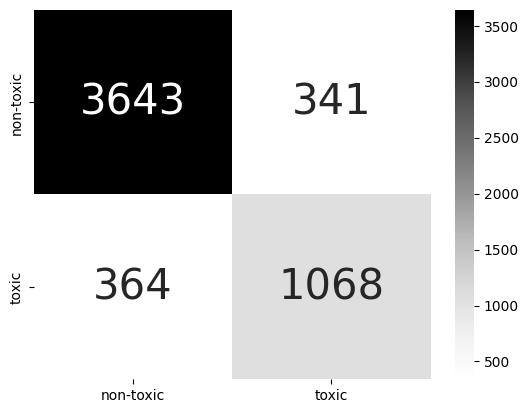

In [60]:
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
# Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix
cf1 = confusion_matrix(all_true_labels, all_pred_labels)
df_cm1 = pd.DataFrame(cf1, index = ["non-toxic","toxic"],
                  columns = ["non-toxic","toxic"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})